Using the Mnist datasets 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras



In [4]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

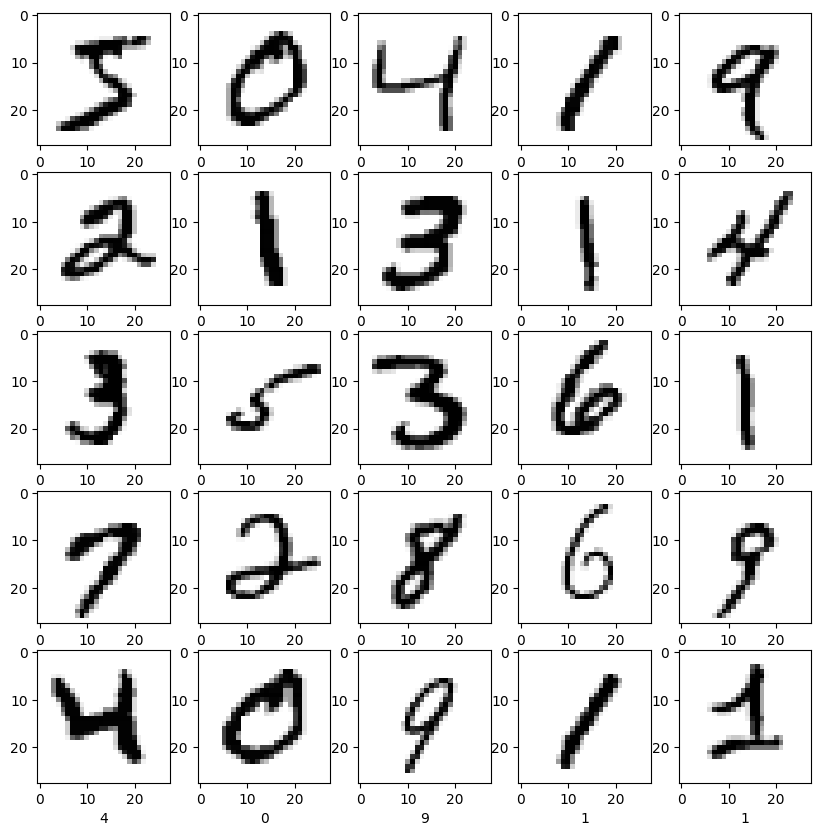

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(X_train[i],cmap= plt.cm.binary)
    plt.xlabel(Y_train[i])

In [13]:
X_train.shape

(60000, 28, 28)

In [12]:
Y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
Y_test.shape

(10000,)

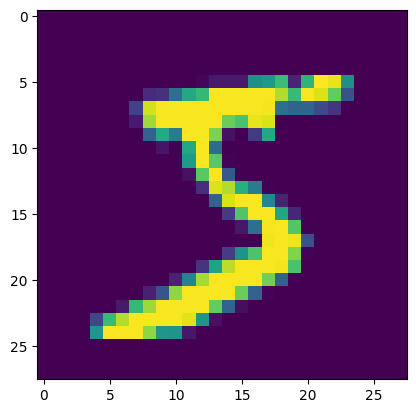

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train= X_train.reshape(X_train.shape+(1,))
X_test= X_test.reshape(X_test.shape+(1,))
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.astype("float32")

In [11]:
for row in X_train[0]:
    for pixel in row:
        print(round(pixel[0],2),end= " ")
    print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.1 0.65 1.0 0.97 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.12 0.14 0.37 0.6 0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.19 0.93 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.98 0.36 0.32 0.32 0.22 0.15 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.86 0.99 0.99 0.99 0.9

Model building Using CNN

In [12]:
from tensorflow.keras import layers


model =tf.keras.Sequential([
    #input layer 
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # hidden layers of convo
    layers.Conv2D(filters = 10,kernel_size =(3,3) , activation='relu'),
    layers.Conv2D(filters = 10,kernel_size =(3,3) , activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters = 10,kernel_size =(3,3) , activation='relu'),
    layers.Conv2D(filters = 10,kernel_size =(3,3) , activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')

])


c:\Users\Inshal Munaf\VsCodeProjects\ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,650 (18.16 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)


In [16]:
model.fit(X_train,Y_train ,epochs=5 , batch_size=64 , validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6655 - loss: 0.9558 - val_accuracy: 0.9482 - val_loss: 0.1713
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9492 - loss: 0.1639 - val_accuracy: 0.9647 - val_loss: 0.1221
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9656 - loss: 0.1159 - val_accuracy: 0.9696 - val_loss: 0.1023
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9722 - loss: 0.0892 - val_accuracy: 0.9736 - val_loss: 0.0908
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9766 - loss: 0.0770 - val_accuracy: 0.9786 - val_loss: 0.0779


In [18]:
test_Loss ,test_Accuracy = model.evaluate(X_test,Y_test)

print('Loss of the model : ', test_Loss)
print('Accuracy of the model : ', round(test_Accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9744 - loss: 0.0806
Loss of the model :  0.06510220468044281
Accuracy of the model :  98


In [19]:
model.save('models/digit_recognizer.h5')